# Regresja liniowa i wielomianowa

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

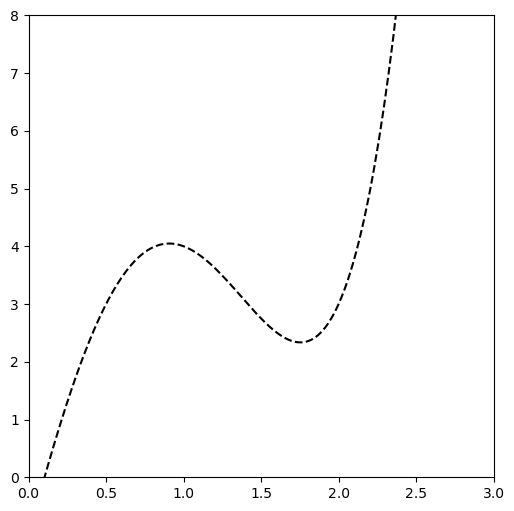

In [3]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)$.

Na ich podstawie będziemy wykonywać naszej presykcji.

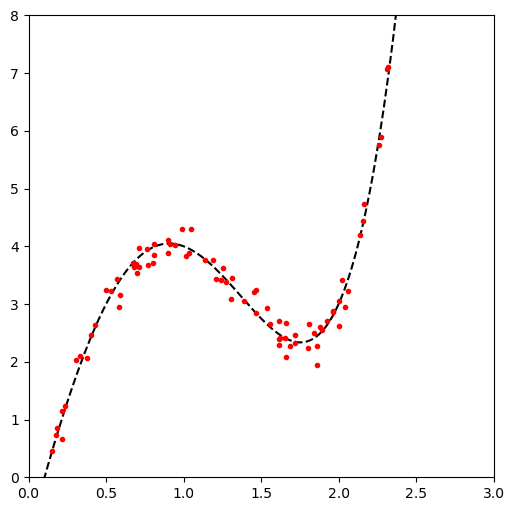

In [4]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=3, color='r');
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.
My narazie urzyjemy metody opartej na rozwiązaniu układu równań liniowych.

In [5]:
x=np.vstack(x)
model1 = linear_model.LinearRegression()
model1.fit(x, y)

LinearRegression()

In [6]:
print(model1.coef_)
print(model1.intercept_)
print(model1.score(x,y))

[6.98127129]
-4.036275081496852
0.4739075600943753


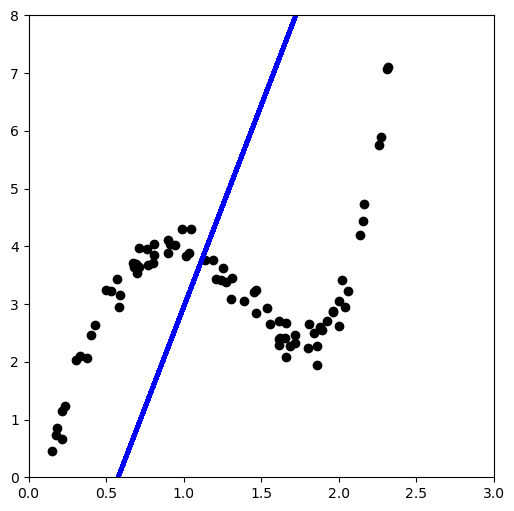

In [7]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x, model1.predict(x), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [9]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

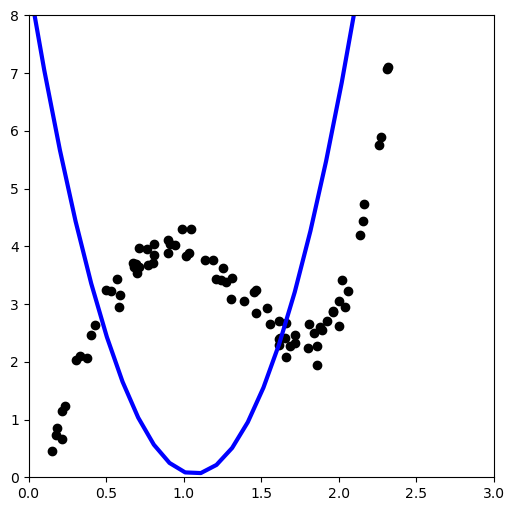

In [10]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model2.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [11]:
model3 = make_pipeline(PolynomialFeatures(7), linear_model.LinearRegression())
model3.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

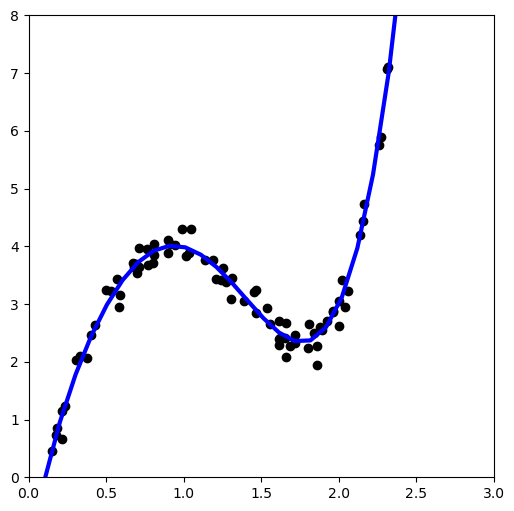

In [12]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model3.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [13]:
model4 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())
model4.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

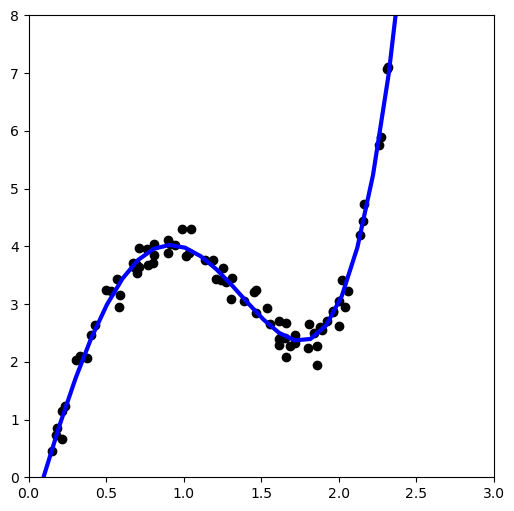

In [14]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model4.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + a_5 \cdot x^5 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [15]:
model5 = make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())
model5.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

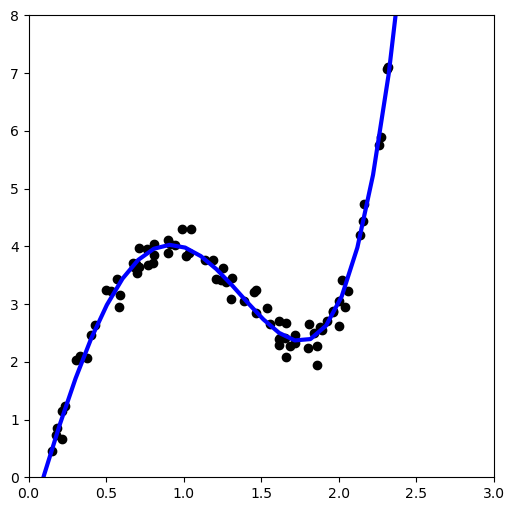

In [16]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model5.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Narysuj wszystkie wyniki na jednym wykresie.

## Która z krzywych jest najleprza?

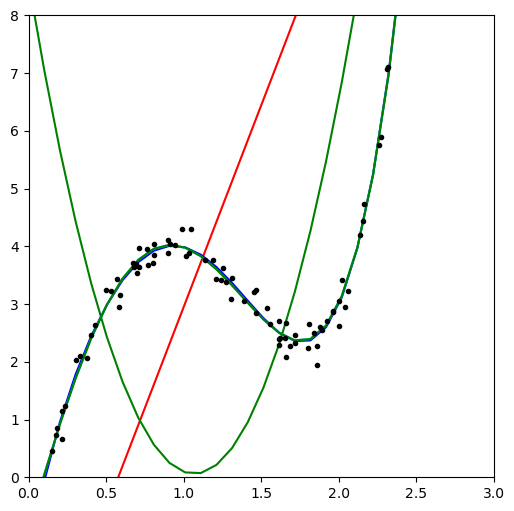

In [17]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_plot, model1.predict(x_plot), 'r');
plt.plot(x_plot, model2.predict(x_plot), 'g');
plt.plot(x_plot, model3.predict(x_plot), 'b');
plt.plot(x_plot, model4.predict(x_plot), 'c');
plt.plot(x_plot, model5.predict(x_plot), 'g');
plt.plot(x, y, 'ok', ms=3);
plt.show()

# Zadanie
Musimy mieć jakąś miarę oceny.

In [18]:
from sklearn import  metrics

error1 = np.average( np.abs(model1.predict(x) -y) )
print("Mean absolute errors: {}".format(error1))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y, model1.predict(x))))

error2 = np.average( (model1.predict(x) -y) **2 )
print("Mean squared error: {}".format(error2))
print("Mean squared error: {}".format( metrics.mean_squared_error(y, model1.predict(x)) ))

error3 = np.median( np.abs(model1.predict(x) -y) )
print("Median absolute error: {}".format( error3 ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y, model1.predict(x)) ))

print("R^2: {}".format(metrics.r2_score(y, model1.predict(x))))
ss_res=np.sum( (y-model1.predict(x))**2 )
ss_tot=np.sum( (y-np.mean(y))**2 )
R=1-ss_res/ss_tot
print("R^2: {}".format(R))

error4 = 1-np.var(y - model1.predict(x) )/np.var(y)
print("Explained variance score: {}".format( error4 ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y, model1.predict(x)) ))


Mean absolute errors: 4.594627284854573
Mean absolute errors: 4.594627284854573
Mean squared error: 36.09045934633917
Mean squared error: 36.09045934633917
Median absolute error: 3.581368007153844
Median absolute error: 3.581368007153844
R^2: 0.4739075600943753
R^2: 0.4739075600943753
Explained variance score: 0.4739075600943752
Explained variance score: 0.4739075600943752


# Zadanie

Wylicz powyższe miary dla wszytkich modeli.

In [19]:
print("model1")
error1 = np.average( np.abs(model1.predict(x) -y) )
print("Mean absolute errors: {}".format(error1))
error2 = np.average( (model1.predict(x) -y) **2 )
print("Mean squared error: {}".format(error2))
error3 = np.median( np.abs(model1.predict(x) -y) )
print("Median absolute error: {}".format( error3 ))
error4 = 1-np.var(y - model1.predict(x) )/np.var(y)
print("Explained variance score: {}".format( error4 ))

model1
Mean absolute errors: 4.594627284854573
Mean squared error: 36.09045934633917
Median absolute error: 3.581368007153844
Explained variance score: 0.4739075600943752


In [20]:
print("model2")
error1 = np.average( np.abs(model2.predict(x) -y) )
print("Mean absolute errors: {}".format(error1))
error2 = np.average( (model2.predict(x) -y) **2 )
print("Mean squared error: {}".format(error2))
error3 = np.median( np.abs(model2.predict(x) -y) )
print("Median absolute error: {}".format( error3 ))
error4 = 1-np.var(y - model2.predict(x) )/np.var(y)
print("Explained variance score: {}".format( error4 ))

model2
Mean absolute errors: 3.0544982899963538
Mean squared error: 12.838244099106914
Median absolute error: 2.9391140983251995
Explained variance score: 0.8128562704789113


In [21]:
print("model3")
error1 = np.average( np.abs(model3.predict(x) -y) )
print("Mean absolute errors: {}".format(error1))
error2 = np.average( (model3.predict(x) -y) **2 )
print("Mean squared error: {}".format(error2))
error3 = np.median( np.abs(model3.predict(x) -y) )
print("Median absolute error: {}".format( error3 ))
error4 = 1-np.var(y - model3.predict(x) )/np.var(y)
print("Explained variance score: {}".format( error4 ))

model3
Mean absolute errors: 0.1481171482336221
Mean squared error: 0.03608988472645306
Median absolute error: 0.10908265794334748
Explained variance score: 0.9994739159363574


In [22]:
print("model4")
error1 = np.average( np.abs(model4.predict(x) -y) )
print("Mean absolute errors: {}".format(error1))
error2 = np.average( (model4.predict(x) -y) **2 )
print("Mean squared error: {}".format(error2))
error3 = np.median( np.abs(model4.predict(x) -y) )
print("Median absolute error: {}".format( error3 ))
error4 = 1-np.var(y - model4.predict(x) )/np.var(y)
print("Explained variance score: {}".format( error4 ))

model4
Mean absolute errors: 0.15054209556132087
Mean squared error: 0.0371575797934111
Median absolute error: 0.11675532000845212
Explained variance score: 0.9994583520917008


In [23]:
print("model5")
error1 = np.average( np.abs(model5.predict(x) -y) )
print("Mean absolute errors: {}".format(error1))
error2 = np.average( (model5.predict(x) -y) **2 )
print("Mean squared error: {}".format(error2))
error3 = np.median( np.abs(model5.predict(x) -y) )
print("Median absolute error: {}".format( error3 ))
error4 = 1-np.var(y - model5.predict(x) )/np.var(y)
print("Explained variance score: {}".format( error4 ))  

model5
Mean absolute errors: 0.15072257482686924
Mean squared error: 0.03715309756429807
Median absolute error: 0.1164536556880621
Explained variance score: 0.9994584174293798
